<pre>Experiment No         : 4
Date                  : 15/02/2023</pre>
# <center>Support Vector Machines (SVMs)</center>

### Importing the required packages and reading the dataset

In [1]:
import numpy as np
import pandas as pd
data= pd.read_csv("res/aug_train.csv")

### Performing minimal preprocessing

In [2]:
data.drop(['enrollee_id','company_size'], axis= 1, inplace= True)
data['city']= data['city'].apply(lambda c: int(c[5:]))
data.dropna(inplace= True)
data['gender'].replace({'Male': 0, 'Female': 1, 'Other': 2}, inplace= True)
data['relevent_experience'].replace({'No relevent experience': 0, 'Has relevent experience': 1}, inplace= True)
data['enrolled_university'].replace({'no_enrollment': 0, 'Part time course': 1, 'Full time course': 2}, inplace= True)
data['education_level'].replace({'Graduate': 0, 'Masters': 1, 'Phd': 2}, inplace= True)
data['major_discipline'].replace({'STEM': 0, 'Humanities': 1, 'Business Degree': 2, 'Other': 3, 'No Major': 4, 'Arts': 5}, inplace= True)
data['experience'].replace({'>20': '21', '<1': '0'}, inplace= True)
data['experience']= pd.to_numeric(data['experience'])
data['company_type'].replace({'Pvt Ltd': 0, 'Funded Startup': 1, 'Early Stage Startup': 2, 'Public Sector': 3, 'NGO': 4, 'Other': 5}, inplace= True)
data['last_new_job'].replace({'>4': '5', 'never': '0'}, inplace= True)
data['last_new_job']= pd.to_numeric(data['last_new_job'])

### Final Processed Dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9238 entries, 1 to 19155
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    9238 non-null   int64  
 1   city_development_index  9238 non-null   float64
 2   gender                  9238 non-null   int64  
 3   relevent_experience     9238 non-null   int64  
 4   enrolled_university     9238 non-null   int64  
 5   education_level         9238 non-null   int64  
 6   major_discipline        9238 non-null   int64  
 7   experience              9238 non-null   int64  
 8   company_type            9238 non-null   int64  
 9   last_new_job            9238 non-null   int64  
 10  training_hours          9238 non-null   int64  
 11  target                  9238 non-null   float64
dtypes: float64(2), int64(10)
memory usage: 938.2 KB


In [4]:
data

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
1,40,0.776,0,0,0,0,0,15,0,5,47,0.0
4,162,0.767,0,1,0,1,0,21,1,4,8,0.0
7,46,0.762,0,1,0,0,0,13,0,5,18,1.0
8,103,0.920,0,1,0,0,0,7,0,1,46,1.0
11,103,0.920,0,1,0,0,0,5,0,1,108,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19147,21,0.624,0,0,2,0,0,1,0,1,52,1.0
19149,103,0.920,0,1,0,1,0,9,0,1,36,1.0
19150,160,0.920,1,1,0,0,0,10,3,3,23,0.0
19152,103,0.920,1,1,0,0,1,7,1,1,25,0.0


### Preparing Data
#### Apply MinMax Scaling

In [5]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)
encD = pd.DataFrame(scaled, columns= data.columns)
encD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9238 entries, 0 to 9237
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    9238 non-null   float64
 1   city_development_index  9238 non-null   float64
 2   gender                  9238 non-null   float64
 3   relevent_experience     9238 non-null   float64
 4   enrolled_university     9238 non-null   float64
 5   education_level         9238 non-null   float64
 6   major_discipline        9238 non-null   float64
 7   experience              9238 non-null   float64
 8   company_type            9238 non-null   float64
 9   last_new_job            9238 non-null   float64
 10  training_hours          9238 non-null   float64
 11  target                  9238 non-null   float64
dtypes: float64(12)
memory usage: 866.2 KB


In [6]:
encD

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
0,0.219101,0.654691,0.0,0.0,0.0,0.0,0.0,0.714286,0.0,1.0,0.137313,0.0
1,0.904494,0.636727,0.0,1.0,0.0,0.5,0.0,1.000000,0.2,0.8,0.020896,0.0
2,0.252809,0.626747,0.0,1.0,0.0,0.0,0.0,0.619048,0.0,1.0,0.050746,1.0
3,0.573034,0.942116,0.0,1.0,0.0,0.0,0.0,0.333333,0.0,0.2,0.134328,1.0
4,0.573034,0.942116,0.0,1.0,0.0,0.0,0.0,0.238095,0.0,0.2,0.319403,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9233,0.112360,0.351297,0.0,0.0,1.0,0.0,0.0,0.047619,0.0,0.2,0.152239,1.0
9234,0.573034,0.942116,0.0,1.0,0.0,0.5,0.0,0.428571,0.0,0.2,0.104478,1.0
9235,0.893258,0.942116,0.5,1.0,0.0,0.0,0.0,0.476190,0.6,0.6,0.065672,0.0
9236,0.573034,0.942116,0.5,1.0,0.0,0.0,0.2,0.333333,0.2,0.2,0.071642,0.0


#### Splitting the dataset into input and target attributes

In [7]:
cols=['city_development_index', 'gender', 'relevent_experience', 'enrolled_university', 'major_discipline', 'experience', 'company_type', 'last_new_job', 'training_hours']
X=encD[cols]
y=encD['target']

#### Splitting the dataset into training and test sets

In [8]:
#Split into train and test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40) 

### Modelling with default hyperparameters

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score 

svc=SVC()

svc.fit(X_train,y_train) 
y_pred=svc.predict(X_test) 

print(f'Model accuracy score (default): {accuracy_score(y_test, y_pred):0.4f}') 

Model accuracy score (default): 0.8420


### Modelling with RBF Kernel and `C=100.0`

In [10]:
svc=SVC(C=100.0) 

svc.fit(X_train,y_train) 
y_pred=svc.predict(X_test) 

print(f'Model accuracy score (RBF kernel, C=100.0) : {accuracy_score(y_test, y_pred):0.4f}') 

Model accuracy score (RBF kernel, C=100.0) : 0.8463


### Modelling with Linear Kernel and `C=1.0`

In [11]:
linear_svc=SVC(kernel='linear', C=1.0) 

linear_svc.fit(X_train,y_train) 
y_pred_test=linear_svc.predict(X_test) 

print(f'Model accuracy score with linear kernel and C=1.0 : {accuracy_score(y_test, y_pred_test):0.4f}')

Model accuracy score with linear kernel and C=1.0 : 0.8328


### Modelling with Sigmoid Kernel and `C=1.0`

In [12]:
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 

sigmoid_svc.fit(X_train,y_train) 
y_pred=sigmoid_svc.predict(X_test) 

print(f'Model accuracy score (sigmoid kernel, C=1.0) : {accuracy_score(y_test, y_pred):0.4f}') 

Model accuracy score (sigmoid kernel, C=1.0) : 0.7143


#### Analysing the model performance

In [13]:
from sklearn.metrics import mean_absolute_error, confusion_matrix, ConfusionMatrixDisplay, classification_report

y_train_pred = svc.predict(X_train)
mae_train = mean_absolute_error(y_train, y_train_pred) 
mae_test = mean_absolute_error(y_test, y_pred) 

print(f"Mean Absolute Error of the model in training dataset: {mae_train}")
print(f"Mean Absolute Error of the model in testing dataset : {mae_test}") 

if mae_train < mae_test:
    print("\nThe model is overfit")
else:
    print("\nThe model is underfit")

Mean Absolute Error of the model in training dataset: 0.13058186738836267
Mean Absolute Error of the model in testing dataset : 0.2857142857142857

The model is overfit


##### Confusion Matrix

In [14]:
confusion_matrix(y_test, y_pred)

array([[1289,  250],
       [ 278,   31]])

##### Visualize Confusion Matrix

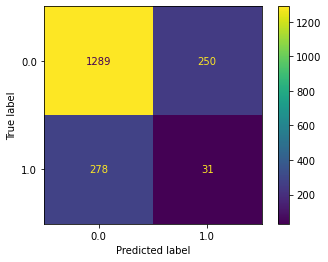

In [15]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred, labels=svc.classes_), display_labels=svc.classes_).plot()

##### Classification Report

In [16]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

         0.0       0.82      0.84      0.83      1539
         1.0       0.11      0.10      0.11       309

    accuracy                           0.71      1848
   macro avg       0.47      0.47      0.47      1848
weighted avg       0.70      0.71      0.71      1848

